In [17]:
import pandas as pd
ev_dataset = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_dataset.head)

<bound method NDFrame.head of         VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap      Suquamish    WA      98392.0        2021   
...            ...        ...            ...   ...          ...         ...   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177862  KM8K23AG1P      Mason        Shelton    WA      98584.0        2023   
177863  5YJYGDEE6M      Grant         Quincy    WA      98848.0        2021   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make   

In [18]:
ev_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [19]:
ev_dataset.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [20]:
ev_dataset = ev_dataset.dropna()

C:\Users\USER\AppData\Local\Temp\ipykernel_2764\3925690492.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


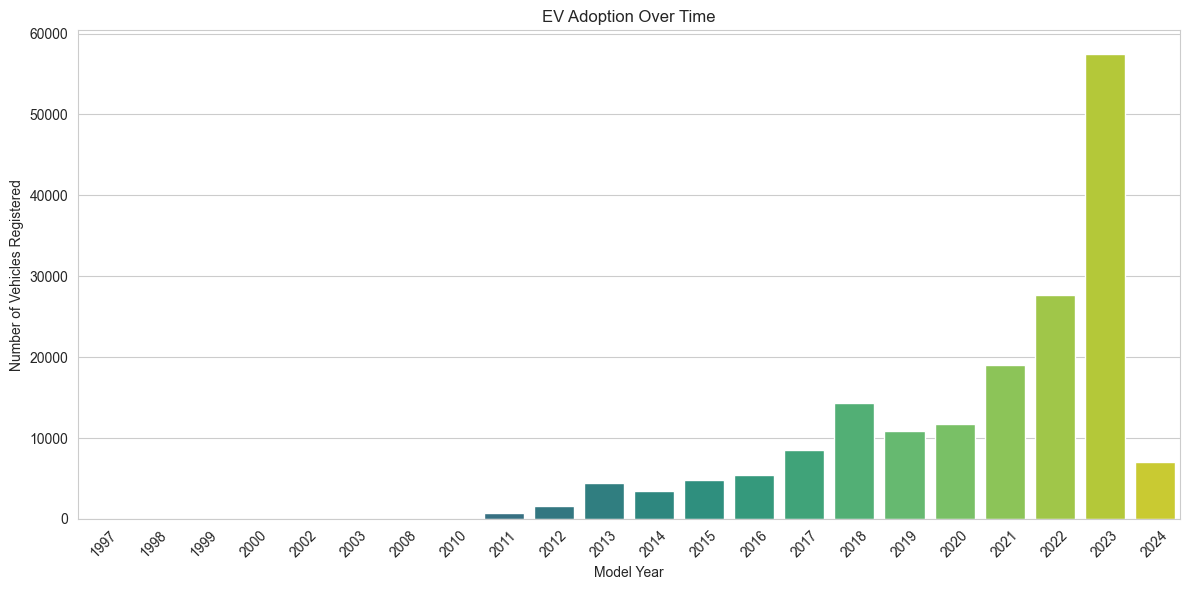

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_dataset['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those countries:

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')
      County       City  Number of Vehicles
0       King    Seattle               29447
1       King   Bellevue                8930
2       King    Redmond                6478
3       King   Kirkland                5362
4       King  Sammamish                5280
5       King     Renton                4980
6  Snohomish    Bothell                4663
7     Pierce     Tacoma                3722
8       King    Tukwila                2927
9       King       Kent                2782


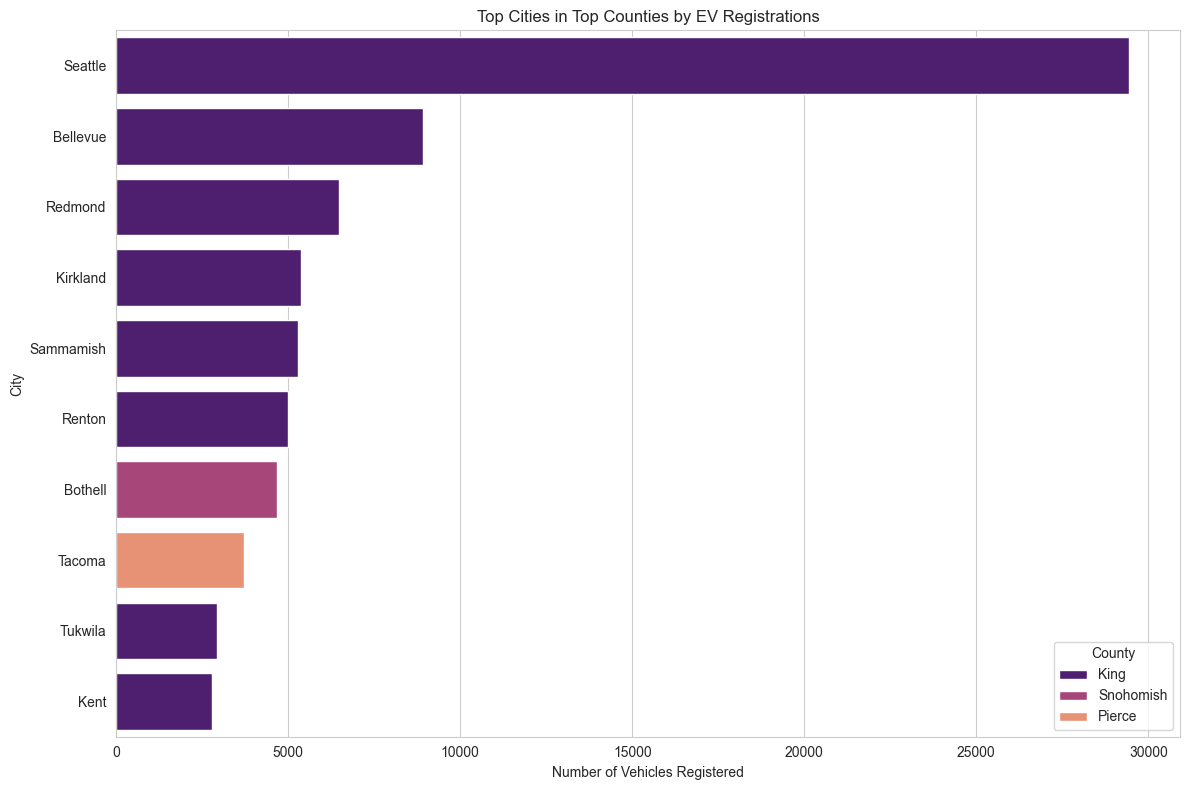

In [22]:
# geographical distribution at county level
ev_county_distribution = ev_dataset['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
print(top_counties)

# filtering the dataset for these top counties
top_counties_data = ev_dataset[ev_dataset['County'].isin(top_counties)]


# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)
print(top_cities)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='County',data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2764\776368602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


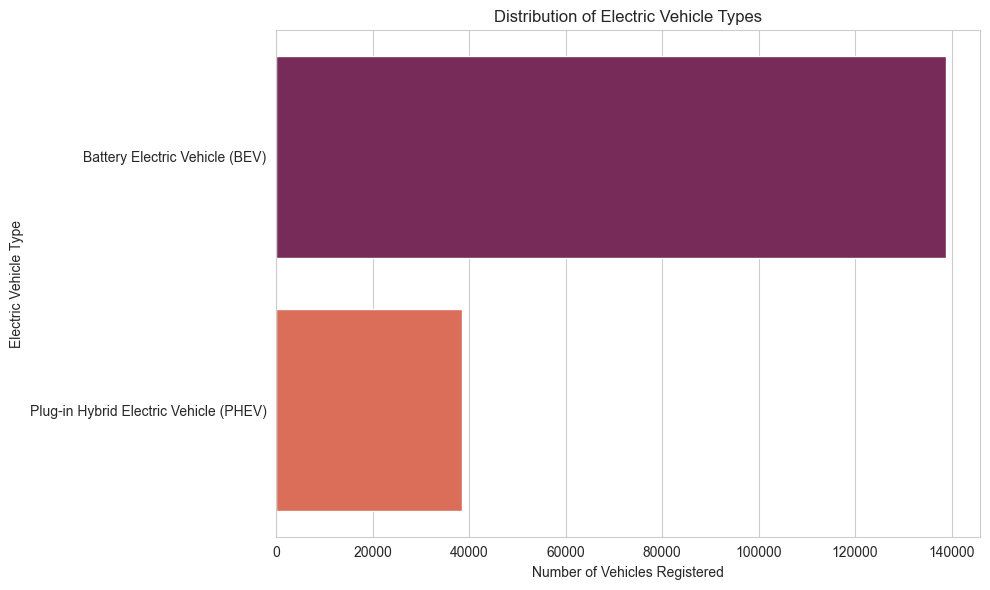

In [23]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_dataset['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2764\1446548039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


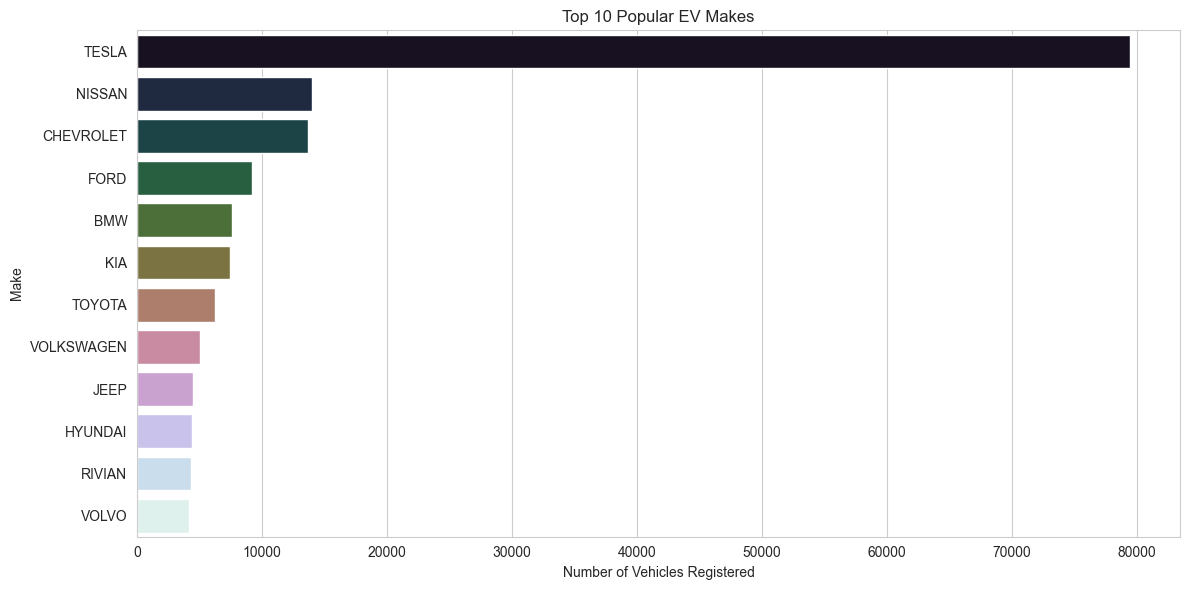

In [24]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_dataset['Make'].value_counts().head(12)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

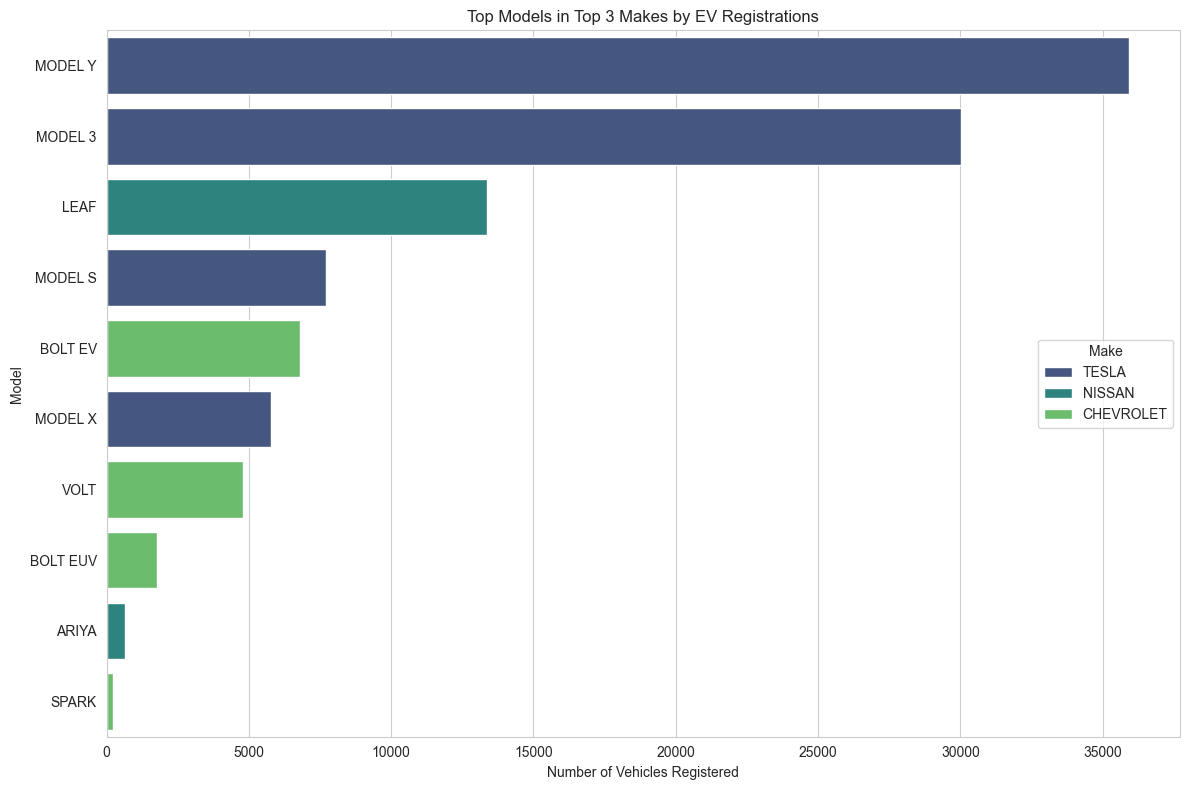

In [25]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_dataset[ev_dataset['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

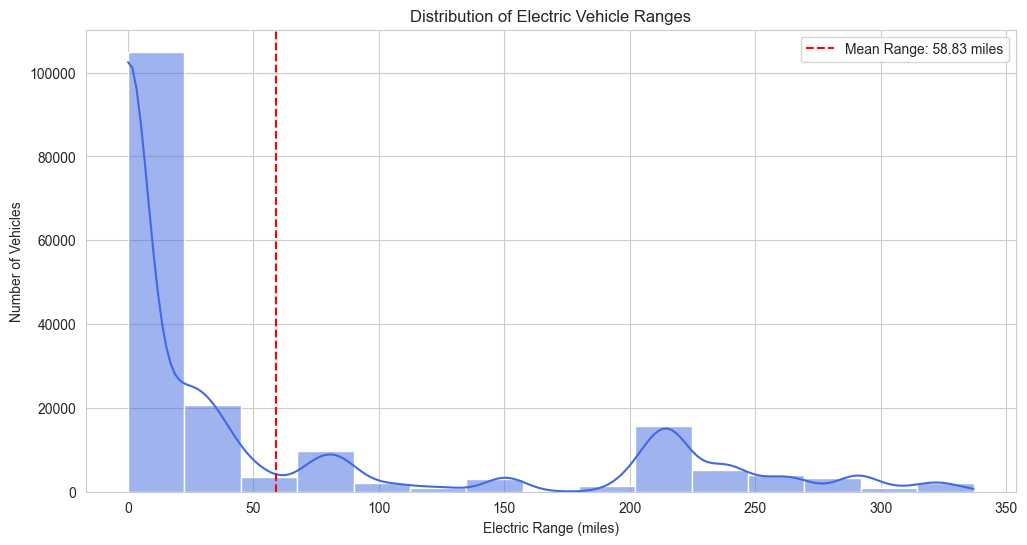

In [26]:
#analyzing the distribution of the electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_dataset['Electric Range'], bins= 15, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_dataset['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_dataset["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()



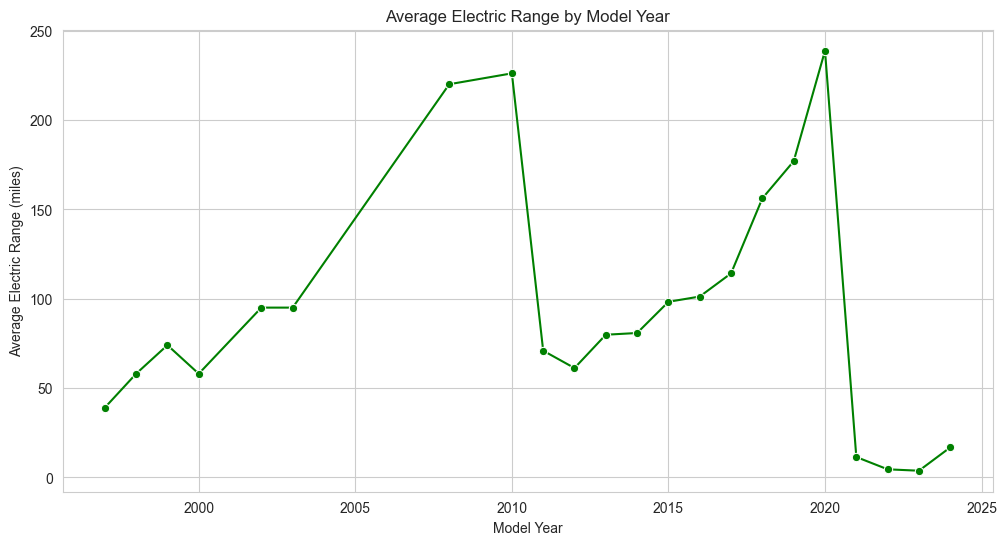

In [27]:
# calculating the average electric range by model year
average_range_by_year = ev_dataset.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


Let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:

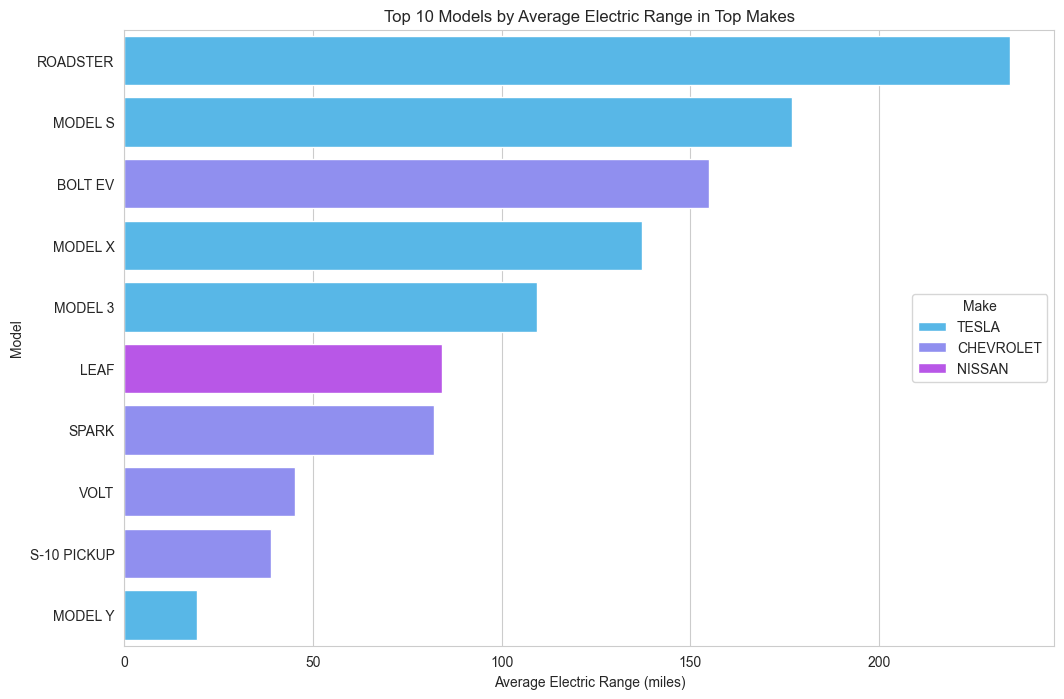

In [28]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

Estimated Market Size Analysis of Electric Vehicles in the United States

In [29]:
#Calculate the number of ev registered per year 
ev_registration_counts = ev_dataset['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [30]:
#To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


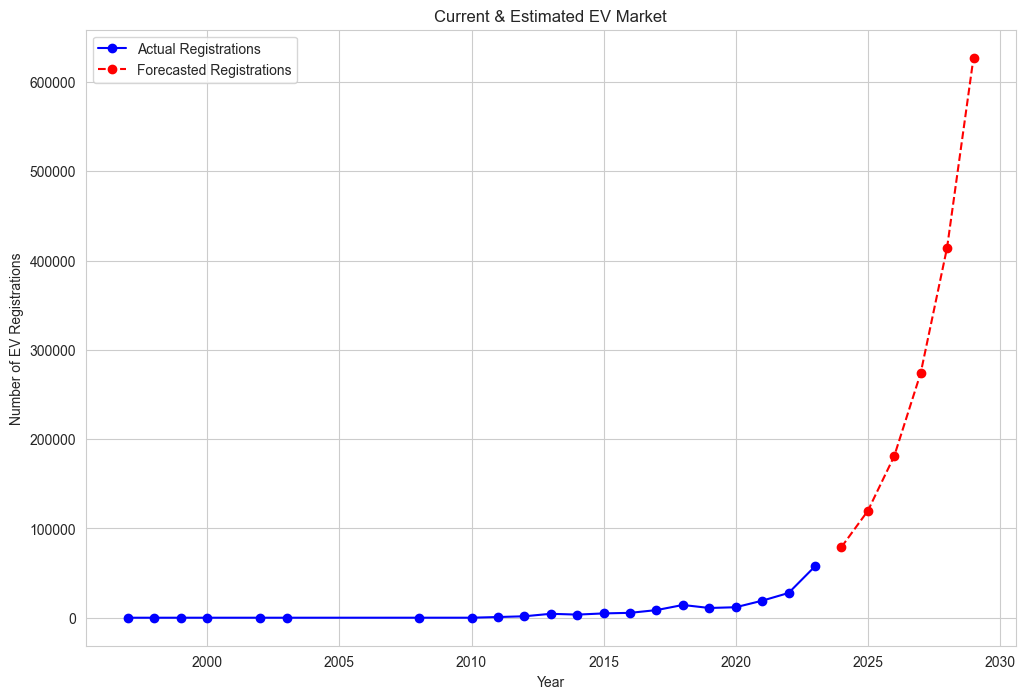

In [31]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

In [32]:
Summary
So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2810087042.py, line 2)